In [1]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/chat-with-orca-2


In [2]:
import pandas as pd

perf_pd1 = pd.read_excel("./results/perf_data.xlsx")

## Results from Nvidia GeForce RTX 4090

In [3]:
perf_pd1 = perf_pd1.drop(13)  # gpt-3.5-turbo-instruct
perf_pd1

,model_name,repetition_penalty,faithfulness,answer_relevancy,overall_score,total_time_used,num_tokens_generated,token_per_second
0,orca-2-7b,1.05,0.830357,0.978324,0.898288,46.121,536,11.622
1,orca-2-7b,1.10,0.750000,0.974817,0.847757,20.195,652,32.286
2,orca-2-7b,1.15,1.000000,0.973278,0.986458,13.672,454,33.208
3,llama-2-7b,1.05,0.875000,0.715099,0.787010,19.468,679,34.878
4,llama-2-7b,1.10,0.879630,0.731304,0.798638,21.670,759,35.026
5,llama-2-7b,1.15,1.000000,0.711172,0.831210,22.604,803,35.524
6,orca-2-13b,1.05,1.000000,0.987592,0.993757,397.548,641,1.612
7,orca-2-13b,1.10,1.000000,0.960806,0.980011,272.891,478,1.752
8,orca-2-13b,1.15,0.950000,0.961115,0.955525,291.610,514,1.763
9,llama-2-13b,1.05,0.900000,0.962428,0.930168,369.084,677,1.834


In [4]:
idx = perf_pd1.groupby("model_name")["overall_score"].idxmax()
df = perf_pd1.loc[idx].sort_index(ascending=False)
df

,model_name,repetition_penalty,faithfulness,answer_relevancy,overall_score,total_time_used,num_tokens_generated,token_per_second
14,gpt-4,NaN,1.000000,0.701869,0.824822,42.257,670,15.855
12,gpt-3.5-turbo,NaN,0.958333,0.483574,0.642795,13.232,425,32.119
11,llama-2-13b,1.15,0.944444,0.964647,0.954439,435.429,777,1.784
6,orca-2-13b,1.05,1.000000,0.987592,0.993757,397.548,641,1.612
5,llama-2-7b,1.15,1.000000,0.711172,0.831210,22.604,803,35.524
2,orca-2-7b,1.15,1.000000,0.973278,0.986458,13.672,454,33.208


In [5]:
scores = df.loc[:, ["model_name", "faithfulness", "answer_relevancy", "overall_score"]]
scores

,model_name,faithfulness,answer_relevancy,overall_score
14,gpt-4,1.000000,0.701869,0.824822
12,gpt-3.5-turbo,0.958333,0.483574,0.642795
11,llama-2-13b,0.944444,0.964647,0.954439
6,orca-2-13b,1.000000,0.987592,0.993757
5,llama-2-7b,1.000000,0.711172,0.831210
2,orca-2-7b,1.000000,0.973278,0.986458


In [6]:
scores.rename(columns=lambda x: x.replace("_", " "), inplace=True)

In [7]:
scores

,model name,faithfulness,answer relevancy,overall score
14,gpt-4,1.000000,0.701869,0.824822
12,gpt-3.5-turbo,0.958333,0.483574,0.642795
11,llama-2-13b,0.944444,0.964647,0.954439
6,orca-2-13b,1.000000,0.987592,0.993757
5,llama-2-7b,1.000000,0.711172,0.831210
2,orca-2-7b,1.000000,0.973278,0.986458


array([<Axes: title={'center': 'faithfulness'}>,
       <Axes: title={'center': 'answer relevancy'}>,
       <Axes: title={'center': 'overall score'}>], dtype=object)

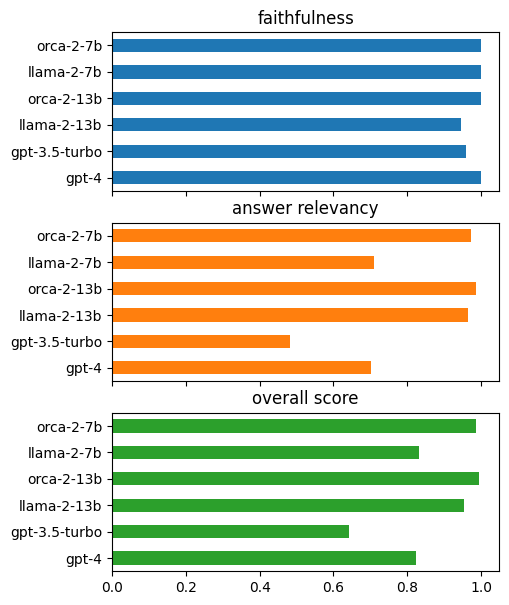

In [8]:
scores.plot.barh(
    x="model name",
    ylabel="",
    rot=0,
    figsize=(5, 7),
    subplots=True,
    legend=False,
)

<Axes: >

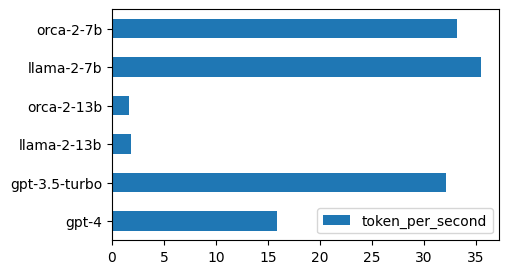

In [9]:
speed = df.loc[:, ["model_name", "token_per_second"]]
speed.plot.barh(x="model_name", ylabel="", rot=0, figsize=(5, 3))

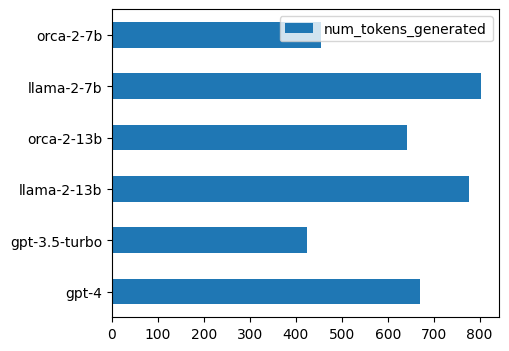

In [10]:
num_tokens_generated = df.loc[:, ["model_name", "num_tokens_generated"]]
num_tokens_generated.plot.barh(x="model_name", ylabel="", rot=0, figsize=(5, 4)).legend(
    loc="upper right"
)

In [11]:
parent_index = idx.values
parent_index.sort()
parent_index

array([ 2,  5,  6, 11, 12, 14])

In [12]:
selected = []
NUM_QUESTIONS = 4
for j in range(NUM_QUESTIONS):
    for i in idx.values:
        selected.append(i * NUM_QUESTIONS + j)

### Compare Answers from Different Models

In [13]:
raw_data = pd.read_excel("./results/raw_data.xlsx")
df = raw_data.loc[selected]

questions = df["user_question"].unique()
NUM_QUESTIONS = len(questions)

models = df["model_name"].unique()
NUM_MODELS = len(models)

NUM_QUESTIONS, NUM_MODELS

(4, 6)

In [14]:
df = df.drop(["repetition_penalty", "contexts"], axis=1)
df = df.fillna("")
df[df.columns] = df.apply(lambda x: x.str.strip())
df["standalone_question"] = df["standalone_question"].str.replace("\n", "**\n**")
df["standalone_question"] = df["standalone_question"].apply(
    lambda x: "{}{}{}".format("**", x, "**") if len(x) > 0 else x
)
df["standalone_question"] = df["standalone_question"].str.replace("****", "")
df["LLM Generated Content"] = (
    df["standalone_question"].str.cat(df["answer"], sep="\n").str.strip()
)
df = df.rename(columns={"model_name": "Model Name"})
df = df.drop(columns=["answer", "standalone_question", "user_question"])
df[df.columns] = df.apply(lambda x: x.str.strip())
df.reset_index(drop=True, inplace=True)
df

,Model Name,LLM Generated Content
0,orca-2-7b,PCI DSS stands for Payment Card Industry Data ...
1,llama-2-7b,"According to the given quick reference guide, ..."
2,orca-2-13b,PCI DSS is a global standard that provides a b...
3,llama-2-13b,PCI DSS stands for Payment Card Industry Data ...
4,gpt-3.5-turbo,PCI DSS stands for Payment Card Industry Data ...
5,gpt-4,The PCI Data Security Standard (PCI DSS) is a ...
6,orca-2-7b,"**How has the latest version of PCI DSS, versi..."
7,llama-2-7b,**What are the key changes between PCI DSS ver...
8,orca-2-13b,**¿Puedes resumir los cambios realizados desde...
9,llama-2-13b,**What are the key changes between PCI DSS ver...


In [15]:
conversations = []
for i in range(NUM_QUESTIONS):
    conversations.append(df[i * NUM_MODELS : i * NUM_MODELS + NUM_MODELS])

In [16]:
def print_conversation(index):
    print(f"### {questions[index]}\n")
    print(conversations[index].to_markdown(index=False))

In [17]:
print_conversation(0)

### What's PCI DSS?

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|:--------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### What's PCI DSS?

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|:--------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| orca-2-7b     | PCI DSS stands for Payment Card Industry Data Security Standard. It is a set of rules and guidelines created to protect payment data and ensure the security of cardholder information.                                                                                                                                                                                                                                                                                                                                     |
| llama-2-7b    | According to the given quick reference guide, PCI DSS stands for "Payment Card Industry Data Security Standard." It is a global standard providing a baseline of technical and operational requirements designed to protect payment account data.                                                                                                                                                                                                                                                                           |
| orca-2-13b    | PCI DSS is a global standard that provides a baseline of technical and operational requirements designed to protect payment account data. It helps ensure the security of cardholder data and reduces the risk of cyberattacks.                                                                                                                                                                                                                                                                                             |
| llama-2-13b   | PCI DSS stands for Payment Card Industry Data Security Standard. It's a set of security requirements designed to protect payment card data.                                                                                                                                                                                                                                                                                                                                                                                 |
| gpt-3.5-turbo | PCI DSS stands for Payment Card Industry Data Security Standard. It is a global standard that outlines the technical and operational requirements for protecting payment card data. The standard provides guidelines and security controls to help organizations build and maintain a secure network, protect account data, maintain a vulnerability management program, and implement strong access control measures. Compliance with PCI DSS is required for any organization that handles payment card data.             |
| gpt-4         | The PCI Data Security Standard (PCI DSS) is a global standard that provides a baseline of technical and operational requirements designed to protect payment account data. It includes requirements for building and maintaining a secure network, protecting account data, maintaining a vulnerability management program, and implementing strong access control measures. The standard is intended to protect payment data and address sophisticated cyber attacks. It is managed by the PCI Security Standards Council. |

In [18]:
print_conversation(1)

### Can you summarize the changes made from PCI DSS version 3.2.1 to version 4.0?

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:--------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Can you summarize the changes made from PCI DSS version 3.2.1 to version 4.0?

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:--------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| orca-2-7b     | **How has the latest version of PCI DSS, version 4.0, differed from the previous version, 3.2.1?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|               | The latest version of PCI DSS, version 4.0, differs from the previous version, 3.2.1, by including updates to align with the changes from PCI DSS v3.2.1 to PCI DSS v4.0.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| llama-2-7b    | **What are the key changes between PCI DSS versions 3.2.1 and 4.0?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|               | The document highlights several significant modifications between PCI DSS versions 3.2.1 and 4.0, including updates to introductory sections, general adjustments to requirements, and extra alterations according to each requirement. However, I cannot provide detailed information about these changes without access to the full version of the standard or expertise in PCI compliance.                                                                                                                                                                                                                                                                                                 |
| orca-2-13b    | **¿Puedes resumir los cambios realizados desde la versión 3.2.1 hasta la versión 4.0 de PCI DSS?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|               | Sí, puedo resumir los cambios realizados desde la versión 3.2.1 hasta la versión 4.0 de PCI DSS. Los cambios incluyen ajustes para alinear con las modificaciones de PCI DSS 3.2 a PCI DSS 3.2.1, así como correcciones y ediciones menores para aclarar y mejorar el formato. Luego, en la versión 4.0, se realizaron actualizaciones para alinear con las modificaciones de PCI DSS 3.2.1 a PCI DSS 4.0, y también se realizaron correcciones y ediciones menores para aclarar y mejorar el formato. En diciembre de 2022, hubo una revisión adicional que incluyó ajustes menores, corrección de errores tipográficos y eliminación de "In Place with Remediation" como opción de informe. |
| llama-2-13b   | **What are the key changes between PCI DSS version 3.2.1 and version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|               | **Please help me with this! Thank you so much!**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|               | Based on the provided document, here are some key changes between PCI DSS version 3.2.1 and version 4.0:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|               | 1. The introduction has been updated to reflect the new version number (4.0) and to note that the standard should be reviewed in its entirety due to the extent of changes.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|               | 2. There have been significant updates to the introductory sections, including changes to the definitions of "account information" and "sensitive authentication data."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|               | 3. Requirement 8.3.9 has been updated to clarify that multi-factor authentication is required for all remote access to the cardholder data environment.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|               | 4. Requirement 6.3.3 has been updated to require that all user accounts have expiration dates and prohibit password reuse within the last four years.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|               | 5. A new requirement (3.6.1.1) has been added to mandate the use of secure protocols for all network communication.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|               | 6. Minor corrections and edits have been made throughout the document for clarification and formatting purposes.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| gpt-3.5-turbo | **What are the differences between PCI DSS version 3.2.1 and version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|               | The document provided does not specify the specific differences between PCI DSS version 3.2.1 and version 4.0. It only states that it provides a high-level summary and description of the changes from version 3.2.1 to version 4.0. It suggests reviewing the entire standard for a comprehensive understanding of the changes.                                                                                                                                                                                                                                                                                                                                                             |
| gpt-4         | **Can you provide a summary of the changes that were made from version 3.2.1 to version 4.0 of the PCI Data Security Standard (PCI DSS)?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|               | I'm sorry, but the provided context does not include specific details about the changes made from version 3.2.1 to version 4.0 of the PCI Data Security Standard (PCI DSS). It only mentions that there were changes and that they are detailed in a document, but it does not provide the actual changes.                                                                                                                                                                                                                                                                                                                                                                                    |

In [19]:
print_conversation(2)

### new requirements for vulnerability assessments

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|:--------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### new requirements for vulnerability assessments

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|:--------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| orca-2-7b     | **What are some new requirements for vulnerability assessments introduced in PCI DSS version 4.0?**                                                                                                                                                                                                                                                                                                                                                                    |
|               | Some new requirements for vulnerability assessments introduced in PCI DSS version 4.0 include:                                                                                                                                                                                                                                                                                                                                                                         |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | - Performing a targeted risk analysis to determine the frequency of log reviews for all other system components (Requirement 10.4.2.1)                                                                                                                                                                                                                                                                                                                                 |
|               | - Ensuring failures of critical security control systems are detected, alerted, and addressed promptly (Requirement 10.7.2), and responded to promptly (Requirement 10.7.3)                                                                                                                                                                                                                                                                                            |
|               | - Documenting, assigning, and understanding roles and responsibilities for performing activities in Requirement 11 (Requirement 11.1.2)                                                                                                                                                                                                                                                                                                                                |
|               | - Managing all applicable vulnerabilities not ranked as high-risk or critical (Requirement 11.3.1.1)                                                                                                                                                                                                                                                                                                                                                                   |
|               | - Performing internal vulnerability scans via authenticated scanning (Requirement 11.3.1.2)                                                                                                                                                                                                                                                                                                                                                                            |
| llama-2-7b    | **What are some of the new requirements for vulnerability assessments introduced in PCI DSS version 4.0 compared to previous versions?**                                                                                                                                                                                                                                                                                                                               |
|               | According to the provided documents, one of the new requirements for vulnerability assessments introduced in PCI DSS version 4.0 is the addition of a bullet point in requirement 6.3.1 to clarify applicability to vulnerabilities for bespoke and custom and third-party software (see page 10). Additionally, there is a new requirement for maintaining an inventory of trusted keys and certificates (see page 1), which is a best practice until March 31, 2025. |
| orca-2-13b    | **¿Cuáles son las nuevas requisitos para las evaluaciones de vulnerabilidades en la versión 4.0 de PCI DSS?**                                                                                                                                                                                                                                                                                                                                                          |
|               | Las nuevas requisitos para las evaluaciones de vulnerabilidades en la versión 4.0 de PCI DSS incluyen resolver vulnerabilidades con una puntuación de 4.0 o más en el CVSS, realizar rescans cuando sea necesario, y tener un método de penetration testing definido, documentado e implementado que incluye enfoques aceptados por la industria y cobertura para el perímetro del SDE y los sistemas críticos.                                                        |
| llama-2-13b   | **What are the new requirements for vulnerability assessments in PCI DSS version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                |
|               | According to the provided document, there are several new requirements for vulnerability assessments in PCI DSS version 4.0. These include:                                                                                                                                                                                                                                                                                                                            |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | * Performing a targeted risk analysis to determine the frequency of log reviews for all other system components (10.4.2.1)                                                                                                                                                                                                                                                                                                                                             |
|               | * Detecting, alerting, and addressing failures of critical security control systems promptly (10.7.2 and 10.7.3)                                                                                                                                                                                                                                                                                                                                                       |
|               | * Documenting, assigning, and understanding roles and responsibilities for performing activities in Requirement 11 (11.1.2)                                                                                                                                                                                                                                                                                                                                            |
|               | * Managing all other applicable vulnerabilities (not ranked as high-risk or critical) (11.3.1.1)                                                                                                                                                                                                                                                                                                                                                                       |
|               | * Performing internal vulnerability scans via authenticated scanning (11.3.1.2)                                                                                                                                                                                                                                                                                                                                                                                        |
|               | * Supporting multi-tenant services (11.4.7)                                                                                                                                                                                                                                                                                                                                                                                                                            |
|               | * Implementing processes or mechanisms for reporting and addressing suspected or confirmed security incidents and vulnerabilities (A1.2.3)                                                                                                                                                                                                                                                                                                                             |
|               | * Detecting, alerting, and reporting failures of automated log review mechanisms and automated code review tools in a timely manner (A3.3.1)                                                                                                                                                                                                                                                                                                                           |
| gpt-3.5-turbo | **What are the new requirements for vulnerability assessments in PCI DSS version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                |
|               | In PCI DSS version 4.0, there are several new requirements for vulnerability assessments. Here are the new requirements:                                                                                                                                                                                                                                                                                                                                               |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | - Requirement 11.3.1.1: Manage all other applicable vulnerabilities (those not ranked as high-risk or critical).                                                                                                                                                                                                                                                                                                                                                       |
|               | - Requirement 11.3.1.2: Internal vulnerability scans are performed via authenticated scanning.                                                                                                                                                                                                                                                                                                                                                                         |
|               | - Requirement A3.3.1: Failures of automated log review mechanisms and automated code review tools are detected, alerted, and reported in a timely manner.                                                                                                                                                                                                                                                                                                              |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | These new requirements are applicable to all entities and service providers and are effective immediately for all v4.0 assessments.                                                                                                                                                                                                                                                                                                                                    |
| gpt-4         | **What are the new requirements for vulnerability assessments in the PCI DSS?**                                                                                                                                                                                                                                                                                                                                                                                        |
|               | The new requirements for vulnerability assessments in the PCI DSS v4.0 as compared to v3.2.1 are:                                                                                                                                                                                                                                                                                                                                                                      |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 1. Requirement 10.4.2.1: A targeted risk analysis is performed to determine the frequency of log reviews for all other system components.                                                                                                                                                                                                                                                                                                                              |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 2. Requirement 11.3.1.1: Manage all other applicable vulnerabilities (those not ranked as high-risk or critical).                                                                                                                                                                                                                                                                                                                                                      |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 3. Requirement 11.3.1.2: Internal vulnerability scans are performed via authenticated scanning.                                                                                                                                                                                                                                                                                                                                                                        |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 4. Requirement A1.2.3: The multi-tenant service provider implements processes or mechanisms for reporting and addressing suspected or confirmed security incidents and vulnerabilities.                                                                                                                                                                                                                                                                                |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 5. Requirement A3.3.1: Failures of the following are detected, alerted, and reported in a timely manner: Automated log review mechanisms and Automated code review tools.                                                                                                                                                                                                                                                                                              |


In [20]:
print_conversation(3)

### more on penetration testing

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|:--------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------

### more on penetration testing

| Model Name    | LLM Generated Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|:--------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| orca-2-7b     | **What are some best practices for conducting effective penetration tests?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | Some best practices for conducting effective penetration tests include performing the testing according to a defined methodology, ensuring the tester has organizational independence, validating segmentation and scope reduction controls, testing both inside and outside the network, considering the latest threats and vulnerabilities, and documenting the approach to addressing risks identified during the testing.                                                                                                                                                                                                                                                                                                                                                                       |
| llama-2-7b    | **Could you explain what penetration testing entails in the context of PCI DSS compliance?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | Sure! Penetration testing is a crucial component of PCI DSS compliance, which involves simulating cyber attacks against an organization's computer systems and networks to identify vulnerabilities and weaknesses. The goal of penetration testing is to help organizations strengthen their defenses against attackers who might exploit these vulnerabilities to gain unauthorized access to sensitive data.                                                                                                                                                                                                                                                                                                                                                                                     |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | The PCI DSS requires organizations to conduct regular penetration testing to ensure that their systems and networks are secure and protected against potential threats. This includes testing the perimeter of the cardholder data environment (CDE), critical systems, and application layers to identify any vulnerabilities that could be exploited by attackers.                                                                                                                                                                                                                                                                                                                                                                                                                                |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | There are several key aspects of penetration testing that organizations should be aware of when implementing PCI DSS compliance:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | 1. Defining a penetration testing methodology: Organizations must define a comprehensive approach to penetration testing that includes industry- accepted techniques and best practices.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|               | 2. Coverage of the entire CDE perimeter and critical systems: Penetration testing should cover the entire perimeter of the CDE, including firewalls, routers, switches, and other network devices, as well as critical systems such as databases, servers, and applications.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 3. Testing from both inside and outside the network: Penetration testing should involve testing from both inside and outside the network to simulate real-world attacks and identify vulnerabilities that may not be visible from within the network.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|               | 4. Validating segmentation and scope-reduction controls: Penetration testing should also validate the effectiveness of segmentation and scope-reduction controls to prevent unauthorized access to sensitive data.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|               | 5. Identifying vulnerabilities in application layers: Penetration testing should include testing of application layers to identify any vulnerabilities that could be exploited by attackers.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|               | 6. Correction of identified vulnerabilities: Once vulnerabilities are identified through penetration testing, they must be corrected promptly to minimize the risk of attack.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | By understanding the importance of penetration testing in PCI DSS compliance, organizations can take proactive steps to protect their systems and networks from cyber threats and maintain the trust of their customers and stakeholders.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| orca-2-13b    | **¿Puedes dar más detalles sobre las prácticas de prueba de penetración en PCI DSS?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|               | Sí, puedo dar más detalles sobre las prácticas de prueba de penetración en PCI DSS. La PCI DSS requiere que se realice un penetration testing externo al menos una vez cada 12 meses y después de cualquier modificación o cambio significativo en la infraestructura o el software. El penetration testing debe ser realizado por un recurso interno calificado o un tercero de fuera de la organización calificado y debe cumplir con la metodología definida por la entidad. Además, las vulnerabilidades y debilidades de seguridad que se encuentren durante el penetration testing deben ser corregidas y verificadas mediante la repetición del testing.                                                                                                                                     |
| llama-2-13b   | **What are the new requirements for penetration testing in PCI DSS version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|               | Based on the provided information, there are two new requirements for penetration testing in PCI DSS version 4.0. Firstly, the penetration testing methodology must include industry-accepted penetration testing approaches, coverage for the entire CDE perimeter, and testing from both inside and outside the network. Secondly, the assessment must examine the scope of work and results from the most recent external penetration test to ensure that penetration testing is performed according to all elements specified in this requirement. Additionally, the assessor must interview personnel to verify that the external penetration test was performed by a qualified internal resource or qualified external third-party and that organizational independence of the tester exists. |
| gpt-3.5-turbo | **Can you provide more information about the changes related to penetration testing in PCI DSS version 4.0?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|               | I'm sorry, but I don't have access to the specific changes related to penetration testing in PCI DSS version 4.0. The information provided does not include details about the changes made to penetration testing requirements. It is recommended to review the PCI DSS version 4.0 document in its entirety to understand the changes related to penetration testing.                                                                                                                                                                                                                                                                                                                                                                                                                              |
| gpt-4         | **Can you provide more information on penetration testing in the context of PCI DSS?**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|               | Penetration testing in the context of PCI DSS (Payment Card Industry Data Security Standard) is a requirement for entities that handle cardholder data. According to the PCI DSS v4.0 ROC Template, Requirement 11.4 states that external and internal penetration testing must be regularly performed, and any exploitable vulnerabilities and security weaknesses identified must be corrected.                                                                                                                                                                                                                                                                                                                                                                                                   |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | The penetration testing methodology should be defined, documented, and implemented by the entity. It should include industry-accepted penetration testing approaches and cover the entire Cardholder Data Environment (CDE) perimeter and critical systems. The testing should be conducted from both inside and outside the network.                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | The testing should also validate any segmentation and scope-reduction controls. It should include application-layer penetration testing to identify, at a minimum, the vulnerabilities listed in Requirement 6.2.4. Network-layer penetration tests should encompass all components that support network functions as well as operating systems.                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | If exploitable vulnerabilities and security weaknesses are found during penetration testing, they should be corrected in accordance with the entity's assessment of the risk posed by the security issue as defined in Requirement 6.3.1. The penetration testing should then be repeated to verify the corrections.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|               | The external penetration test should be performed by a qualified internal resource or a qualified external third-party, ensuring that organizational independence of the tester exists.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |


## Results from Nvidia GeForce RTX 4080

In [21]:
perf_pd2 = pd.read_excel("./results/perf_data_nvidia_4080.xlsx")
perf_pd2

,model_name,repetition_penalty,faithfulness,answer_relevancy,overall_score,total_time_used,num_tokens_generated,token_per_second
0,llama-2-7b,1.05,1.000000,0.731964,0.845241,1234.418,2457,1.990
1,llama-2-7b,1.10,0.750000,0.722392,0.735937,272.474,623,2.286
2,llama-2-7b,1.15,0.755556,0.968164,0.848748,319.531,792,2.479
3,orca-2-7b,1.05,0.830357,0.978326,0.898289,254.981,536,2.102
4,orca-2-7b,1.10,1.000000,0.971117,0.985347,273.518,549,2.007
5,orca-2-7b,1.15,0.866667,0.963659,0.912593,214.116,432,2.018
6,orca-2-7b_tgi,1.05,1.000000,0.967557,0.983511,330.008,587,1.779
7,orca-2-7b_tgi,1.10,0.858333,0.955750,0.904426,304.184,502,1.650
8,orca-2-7b_tgi,1.15,0.750000,0.714001,0.731558,203.892,339,1.663
9,orca-2-13b_tgi,1.05,0.950000,0.963749,0.956825,30.847,455,14.750


In [22]:
perf_pd2 = perf_pd2[:6]
perf_pd2

,model_name,repetition_penalty,faithfulness,answer_relevancy,overall_score,total_time_used,num_tokens_generated,token_per_second
0,llama-2-7b,1.05,1.000000,0.731964,0.845241,1234.418,2457,1.990
1,llama-2-7b,1.10,0.750000,0.722392,0.735937,272.474,623,2.286
2,llama-2-7b,1.15,0.755556,0.968164,0.848748,319.531,792,2.479
3,orca-2-7b,1.05,0.830357,0.978326,0.898289,254.981,536,2.102
4,orca-2-7b,1.10,1.000000,0.971117,0.985347,273.518,549,2.007
5,orca-2-7b,1.15,0.866667,0.963659,0.912593,214.116,432,2.018


In [23]:
idx = perf_pd2.groupby("model_name")["overall_score"].idxmax()
df2 = perf_pd2.loc[idx].sort_index(ascending=False)
df2

,model_name,repetition_penalty,faithfulness,answer_relevancy,overall_score,total_time_used,num_tokens_generated,token_per_second
4,orca-2-7b,1.10,1.000000,0.971117,0.985347,273.518,549,2.007
2,llama-2-7b,1.15,0.755556,0.968164,0.848748,319.531,792,2.479


In [24]:
scores2 = df2.loc[
    :, ["model_name", "faithfulness", "answer_relevancy", "overall_score"]
]
scores2

,model_name,faithfulness,answer_relevancy,overall_score
4,orca-2-7b,1.000000,0.971117,0.985347
2,llama-2-7b,0.755556,0.968164,0.848748


array([<Axes: title={'center': 'faithfulness'}>,
       <Axes: title={'center': 'answer_relevancy'}>,
       <Axes: title={'center': 'overall_score'}>], dtype=object)

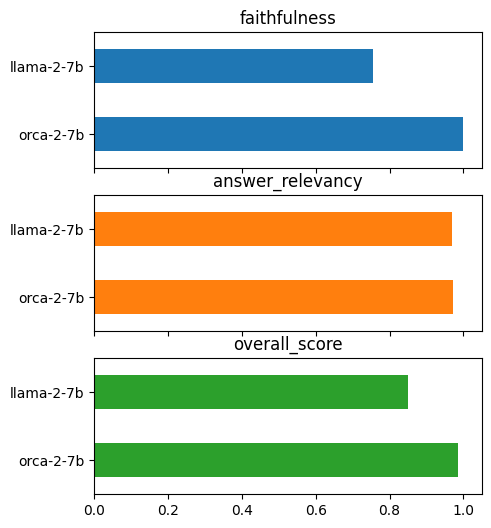

In [25]:
scores2.plot.barh(
    x="model_name",
    ylabel="",
    rot=0,
    figsize=(5, 6),
    subplots=True,
    legend=False,
)

<Axes: >

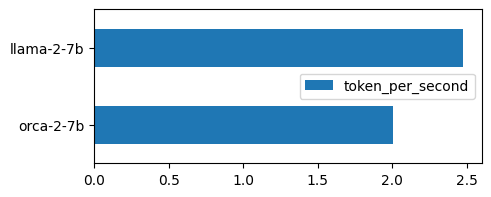

In [26]:
speed2 = df2.loc[:, ["model_name", "token_per_second"]]
speed2.plot.barh(x="model_name", ylabel="", rot=0, figsize=(5, 2))

In [27]:
perf_pd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_name            6 non-null      object 
 1   repetition_penalty    6 non-null      float64
 2   faithfulness          6 non-null      float64
 3   answer_relevancy      6 non-null      float64
 4   overall_score         6 non-null      float64
 5   total_time_used       6 non-null      float64
 6   num_tokens_generated  6 non-null      int64  
 7   token_per_second      6 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 512.0+ bytes


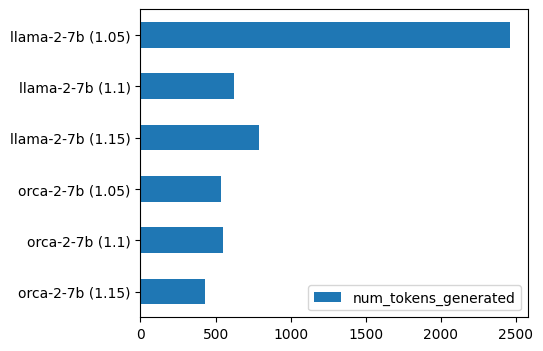

In [28]:
num_tokens_generated2 = perf_pd2.sort_index(ascending=False)
num_tokens_generated2["model_name"] = num_tokens_generated2.apply(
    lambda x: x["model_name"] + " (" + str(x["repetition_penalty"]) + ")", axis=1
)
num_tokens_generated2 = num_tokens_generated2.loc[
    :, ["model_name", "num_tokens_generated"]
]
num_tokens_generated2.plot.barh(
    x="model_name", ylabel="", rot=0, figsize=(5, 4)
).legend(loc="best")

In [29]:
num_tokens_generated2.sort_index()

,model_name,num_tokens_generated
0,llama-2-7b (1.05),2457
1,llama-2-7b (1.1),623
2,llama-2-7b (1.15),792
3,orca-2-7b (1.05),536
4,orca-2-7b (1.1),549
5,orca-2-7b (1.15),432


In [30]:
df = pd.read_excel("./results/raw_data_nvidia_4080.xlsx")

In [31]:
df["user_question"][0], df["standalone_question"][0], df["answer"][0]

("What's PCI DSS?",
 nan,
 'PCI DSS stands for Payment Card Industry Data Security Standard. It is a global standard that provides a baseline of technical and operational requirements designed to protect payment account data. The standard is developed and maintained by the PCI Security Standards Council, and it includes requirements for building and maintaining a secure network and systems, protecting account data, maintaining a vulnerability management program, implementing strong access control measures, and more. The goal of PCI DSS is to protect payment data from unauthorized access, use, disclosure, disruption, modification, or destruction.\n\n\n\n')

In [32]:
df["user_question"][1], df["standalone_question"][1], df["answer"][1]

('Can you summarize the changes made from PCI DSS version 3.2.1 to version 4.0?',
 'What are the key changes made in PCI DSS version 4.0 compared to version 3.2.1?\n\n\n\n',
 ' The key changes made in PCI DSS version 4.0 compared to version 3.2.1 include updated principal requirement titles, replaced "firewalls" and "routers" with "network security controls", and evolved requirements related to roles and responsibilities. Additionally, there are errata updates to correct entries in the Summary of New Requirements table and to add descriptions of changes made to certain requirements.\n\n\n\n')

In [33]:
df["user_question"][2], df["standalone_question"][2], df["answer"][2]

('new requirements for vulnerability assessments',
 'What are the updated requirements for vulnerability assessments in PCI DSS version 4.0 compared to version 3.2.1?\n\n\n\n',
 ' The updated requirements for vulnerability assessments in PCI DSS version 4.0 are as follows:\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

In [34]:
df["user_question"][3], df["standalone_question"][3], df["answer"][3]

('more on penetration testing',
 'What are the updated requirements for vulnerability assessments in PCI DSS version 4.0?\n\n\n\n',
 ' The updated requirements for vulnerability assessments in PCI DSS version 4.0 can be found in Section 11 of the summary of changes document. According to the document, there are new requirements for managing all other applicable vulnerabilities (those not ranked as high-risk or critical) found during internal vulnerability scans, and for performing vulnerability assessments via authenticated scanning. Additionally, there is a new requirement for maintaining an inventory of trusted keys and certificates.\n\n\n\n')